In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

url ="Data/london_weather_MODIFIED - london_weather_MODIFIED.csv"
df = pd.read_csv(url)
df

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
0,19790101,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1,19790102,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
2,19790103,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
3,19790104,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
4,19790105,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0
...,...,...,...,...,...,...,...,...,...,...
15336,20201227,1.0,0.9,32.0,7.5,7.5,7.6,2.0,98000.0,NaN
15337,20201228,7.0,3.7,38.0,3.6,1.1,-1.3,0.2,97370.0,NaN
15338,20201229,7.0,0.0,21.0,4.1,2.6,1.1,0.0,98830.0,NaN
15339,20201230,6.0,0.4,22.0,5.6,2.7,-0.1,0.0,100200.0,NaN


In [2]:
df['date'] = pd.to_datetime(df['date'], format='%Y%m%d')
df['date']

0       1979-01-01
1       1979-01-02
2       1979-01-03
3       1979-01-04
4       1979-01-05
           ...    
15336   2020-12-27
15337   2020-12-28
15338   2020-12-29
15339   2020-12-30
15340   2020-12-31
Name: date, Length: 15341, dtype: datetime64[ns]

In [3]:
df = df.set_index('date')
df

,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
date,,,,,,,,,
1979-01-01,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1979-01-02,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
1979-01-03,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
1979-01-04,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
1979-01-05,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0
...,...,...,...,...,...,...,...,...,...
2020-12-27,1.0,0.9,32.0,7.5,7.5,7.6,2.0,98000.0,NaN
2020-12-28,7.0,3.7,38.0,3.6,1.1,-1.3,0.2,97370.0,NaN
2020-12-29,7.0,0.0,21.0,4.1,2.6,1.1,0.0,98830.0,NaN


In [4]:
df.index

DatetimeIndex(['1979-01-01', '1979-01-02', '1979-01-03', '1979-01-04',
               '1979-01-05', '1979-01-06', '1979-01-07', '1979-01-08',
               '1979-01-09', '1979-01-10',
               ...
               '2020-12-22', '2020-12-23', '2020-12-24', '2020-12-25',
               '2020-12-26', '2020-12-27', '2020-12-28', '2020-12-29',
               '2020-12-30', '2020-12-31'],
              dtype='datetime64[ns]', name='date', length=15341, freq=None)

In [5]:
df_required = df.loc['2000':, ['precipitation', 'mean_temp', 'min_temp', 'max_temp', 'snow_depth']]
df_required


,precipitation,mean_temp,min_temp,max_temp,snow_depth
date,,,,,
2000-01-01,0.0,7.0,4.9,10.8,0.0
2000-01-02,0.2,7.9,5.0,11.5,0.0
2000-01-03,6.0,9.4,7.2,9.5,0.0
2000-01-04,0.2,7.0,4.4,11.0,0.0
2000-01-05,0.8,6.4,1.9,10.8,0.0
...,...,...,...,...,...
2020-12-27,2.0,7.5,7.6,7.5,NaN
2020-12-28,0.2,1.1,-1.3,3.6,NaN
2020-12-29,0.0,2.6,1.1,4.1,NaN


In [6]:
df_required.isna().sum()

precipitation     390
mean_temp         419
min_temp          386
max_temp          390
snow_depth       1752
dtype: int64

In [7]:
## interpolating temperature measures
df_required['mean_temp'] = df_required['mean_temp'].interpolate()
df_required['max_temp'] = df_required['max_temp'].interpolate()
df_required['min_temp'] = df_required['min_temp'].interpolate()

In [8]:
df_required.isna().sum()

precipitation     390
mean_temp           0
min_temp            0
max_temp            0
snow_depth       1752
dtype: int64

In [9]:
df_required['precipitation'] = df_required['precipitation'].fillna(0)
df_required['snow_depth'] = df_required['snow_depth'].fillna(0)

In [10]:
df_required.isna().sum()

precipitation    0
mean_temp        0
min_temp         0
max_temp         0
snow_depth       0
dtype: int64

In [11]:
df_required.head()

,precipitation,mean_temp,min_temp,max_temp,snow_depth
date,,,,,
2000-01-01,0.0,7.0,4.9,10.8,0.0
2000-01-02,0.2,7.9,5.0,11.5,0.0
2000-01-03,6.0,9.4,7.2,9.5,0.0
2000-01-04,0.2,7.0,4.4,11.0,0.0
2000-01-05,0.8,6.4,1.9,10.8,0.0


In [12]:
ts = df_required.loc['2000':'2010',['precipitation']].copy()

<Axes: xlabel='date'>

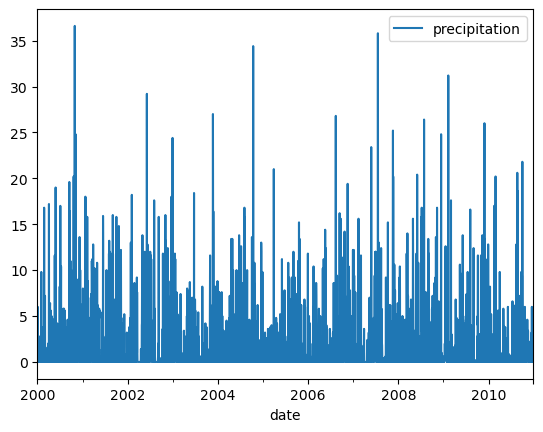

In [13]:
ts.plot()

In [14]:
ts_MS_res = ts.resample("MS").sum()

In [15]:
max_date = ts_MS_res.idxmax()

In [16]:
max_value = ts_MS_res.max()

In [17]:
import matplotlib.dates as mdates
import matplotlib.ticker as mticks

In [18]:
loc_year = mdates.YearLocator()
fmt_year = mdates.DateFormatter("%Y")
minor_loc = mdates.MonthLocator(interval=3)

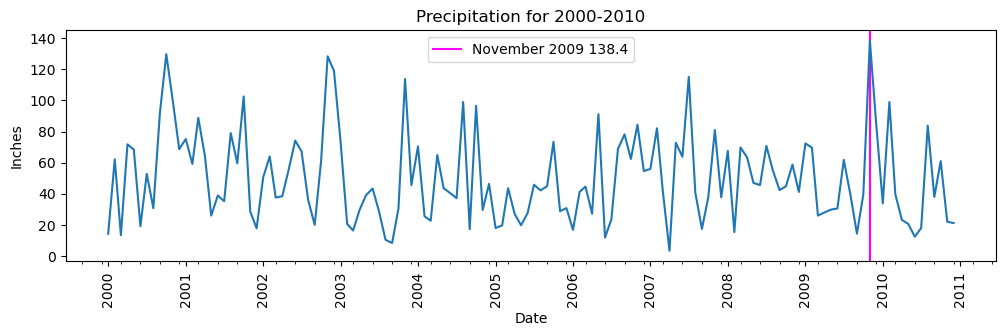

In [19]:
fig, ax = plt.subplots(figsize=(12,3))

ax.set(title='Precipitation for 2000-2010', ylabel='Inches', xlabel='Date')
ax.xaxis.set_major_locator(loc_year)
ax.xaxis.set_major_formatter(fmt_year)


minor_loc =  mdates.MonthLocator(interval=3)
minor_fmt = mdates.DateFormatter("%b")

ax.axvline(max_date, color="magenta", label=(f'{max_date[0].strftime("%B %Y")} {max_value[0]}'))
plt.xticks(rotation=90)
ax.xaxis.set_minor_locator(minor_loc)
ax.plot(ts_MS_res)
plt.legend();

In [20]:
ts = df_required.loc['2000':'2020', ['mean_temp']].copy()
ts

,mean_temp
date,
2000-01-01,7.0
2000-01-02,7.9
2000-01-03,9.4
2000-01-04,7.0
2000-01-05,6.4
...,...
2020-12-27,7.5
2020-12-28,1.1
2020-12-29,2.6


In [25]:
mean_temp_yearly = ts.resample('Y').mean()
mean_temp_yearly

,mean_temp
date,
2000-12-31,11.575683
2001-12-31,11.331507
2002-12-31,12.084247
2003-12-31,12.114521
2004-12-31,11.900683
2005-12-31,11.822877
2006-12-31,12.290822
2007-12-31,11.944384
2008-12-31,11.326776


In [35]:
coldest_year = mean_temp_yearly.idxmin()
coldest_year_value = mean_temp_yearly.min()
coldest_year

mean_temp   2010-12-31
dtype: datetime64[ns]

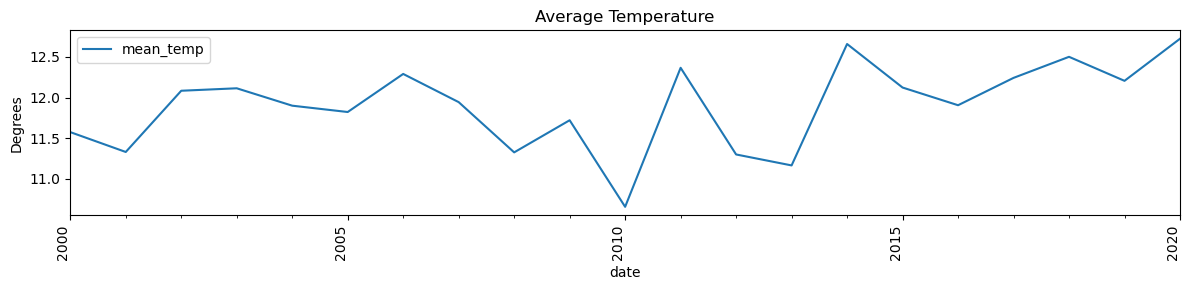

In [43]:
fig, ax = plt.subplots(figsize=(12, 3))
mean_temp_yearly.plot(ax=ax)

ax.set(title='Average Temperature', ylabel='Degrees')


# Adjust date labels for better readability
fig.autofmt_xdate()
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()